In [1]:
%matplotlib inline
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import seaborn as sns
import scipy.stats.mstats as mstats

In [2]:
files_hTERT=[
    'MC-HiC-DpnII-WI38-hTERT-TP2-R1.cis.vecs.tsv',
    'MC-HiC-DpnII-WI38-hTERT-TP4-R1-1.cis.vecs.tsv',
    'MC-HiC-DpnII-WI38-hTERT-TP4-R1-2.cis.vecs.tsv',
    'MC-HiC-DpnII-WI38-hTERT-TP5-R1.cis.vecs.tsv',
    'MC-HiC-DpnII-WI38-hTERT-TP6-R1.cis.vecs.tsv'
]
files_PDL=[
    'MC-HiC-DpnII-WI38-PDL25-TP2-R1.cis.vecs.tsv',
    'MC-HiC-DpnII-WI38-PDL33-TP4-R1.cis.vecs.tsv',
    'MC-HiC-DpnII-WI38-PDL37-TP5-R1.cis.vecs.tsv',
    'MC-HiC-DpnII-WI38-PDL46-TP6-R1.cis.vecs.tsv'
]

names_hTERT= [
    'hTERT-TP2-R1',
    'hTERT-TP4-R1-1',
    'hTERT-TP4-R1-2',
    'hTERT-TP5-R1',
    'hTERT-TP6-R1'
]
names_PDL=[
    'PDL25-TP2-R1',
    'PDL33-TP4-R1',
    'PDL37-TP5-R1',
    'PDL46-TP6-R1'
]

In [3]:
df1 = pd.DataFrame()
df1_ranked=pd.DataFrame()
for i in range(5):
    eigen=pd.read_csv(files_hTERT[i],sep='\t')
    df1[names_hTERT[i]]=eigen['E1']
    ranks = mstats.rankdata(np.ma.masked_invalid(eigen['E1']))
    ranks[ranks == 0] = np.nan
    df1_ranked[names_hTERT[i]]=ranks

/home/sambares/miniconda3/envs/cooler-env/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sambares/miniconda3/envs/cooler-env/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


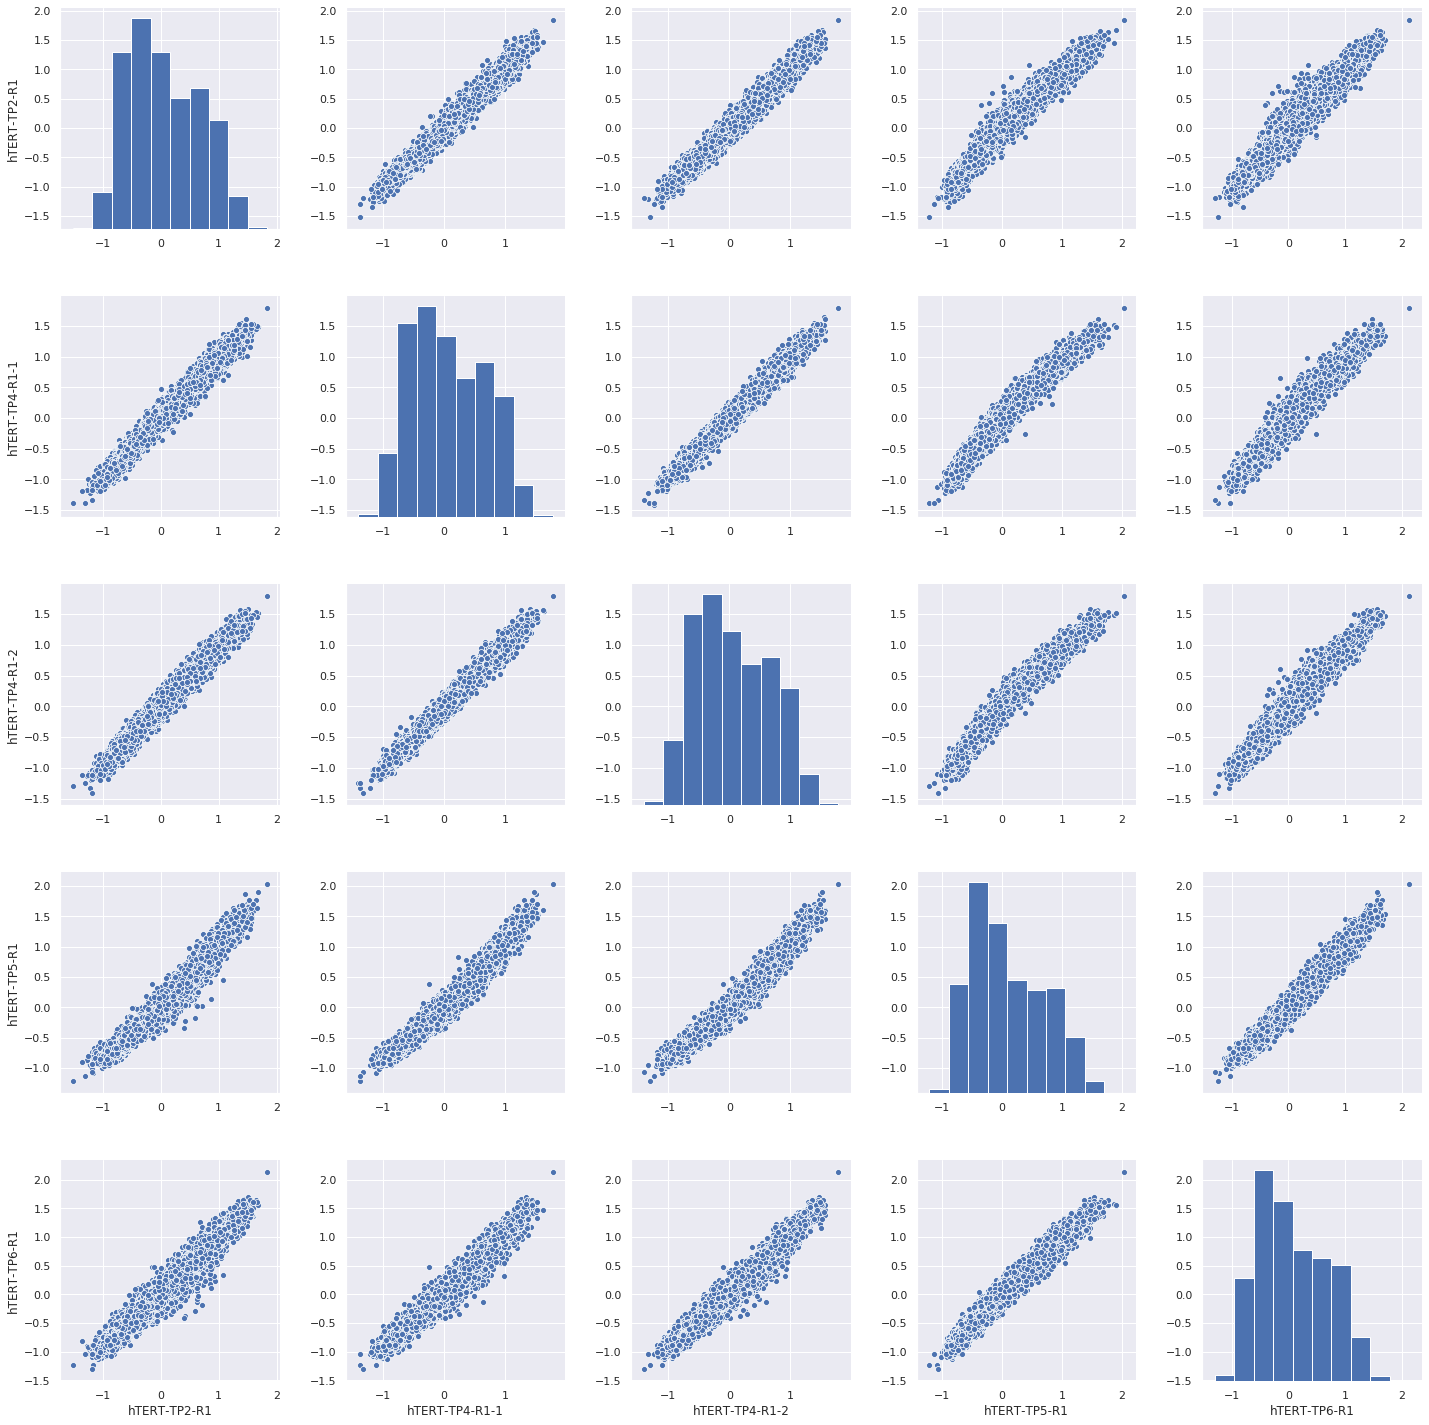

In [33]:
sns.set()
g=sns.pairplot(df1,size=4)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_hTERT)):
    for j in range(len(names_hTERT)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

In [34]:
df2 = pd.DataFrame()
df2_ranked=pd.DataFrame()
for i in range(4):
    eigen=pd.read_csv(files_PDL[i],sep='\t')
    df2[names_PDL[i]]=eigen['E1']
    ranks = mstats.rankdata(np.ma.masked_invalid(eigen['E1']))
    ranks[ranks == 0] = np.nan
    df2_ranked[names_PDL[i]]=ranks

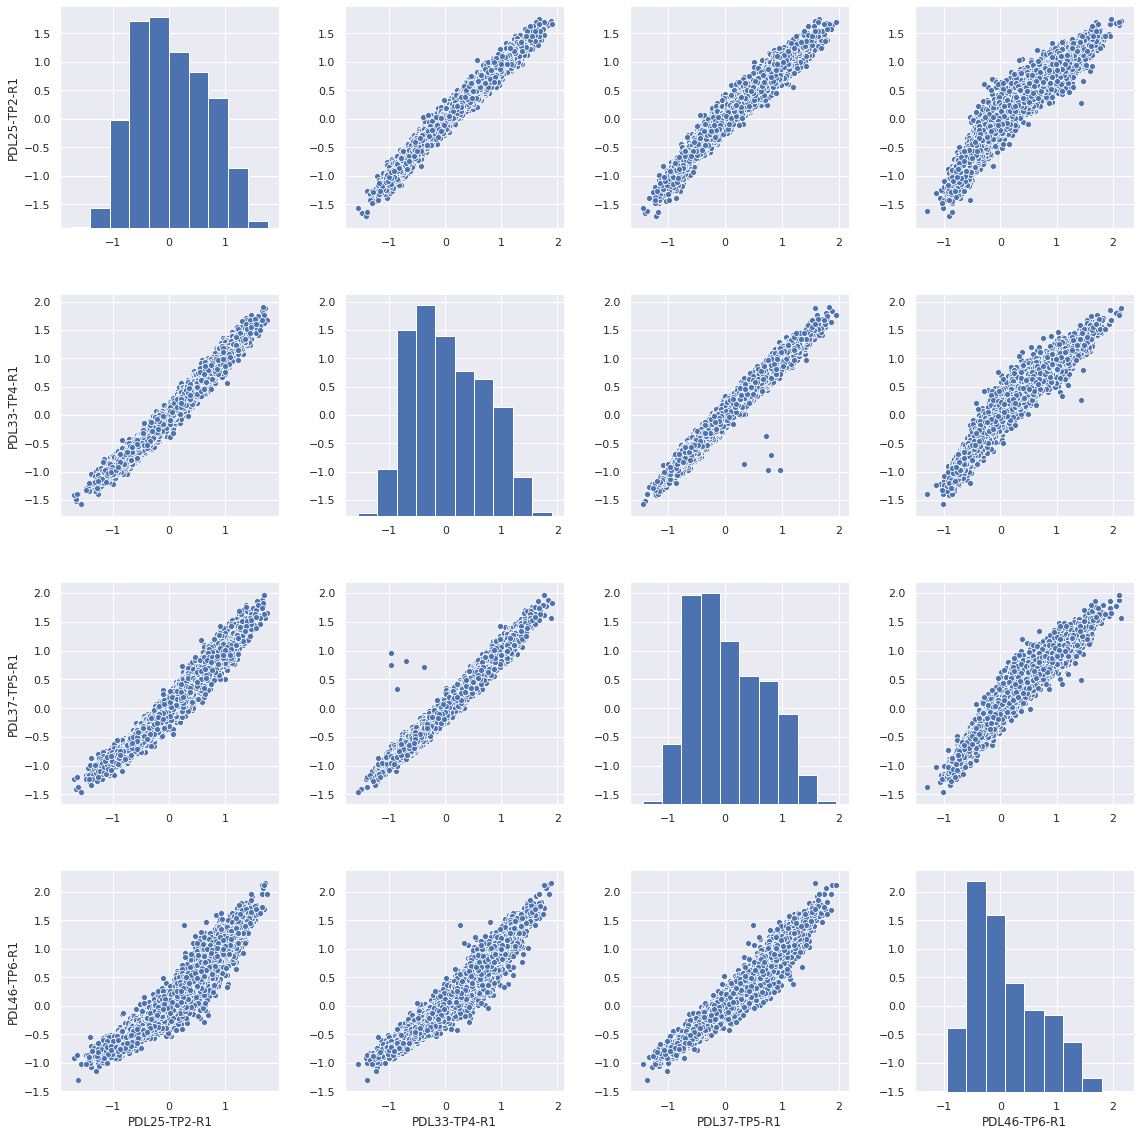

In [35]:
sns.set()
g=sns.pairplot(df2,size=4)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_PDL)):
    for j in range(len(names_PDL)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

In [57]:
mega_df = pd.concat([df1,df2],axis=1)

c1=pd.read_csv('MC-HiC-DpnII-WI38-hTERT-TP2-R1.cis.vecs.tsv',sep='\t')
chrms=c1[['chrom','start','end']]
mergeddf=pd.concat([chrms,mega_df],axis=1)
mergeddf.head()
mergeddf.to_csv('Original.tsv',index=False,sep='\t')

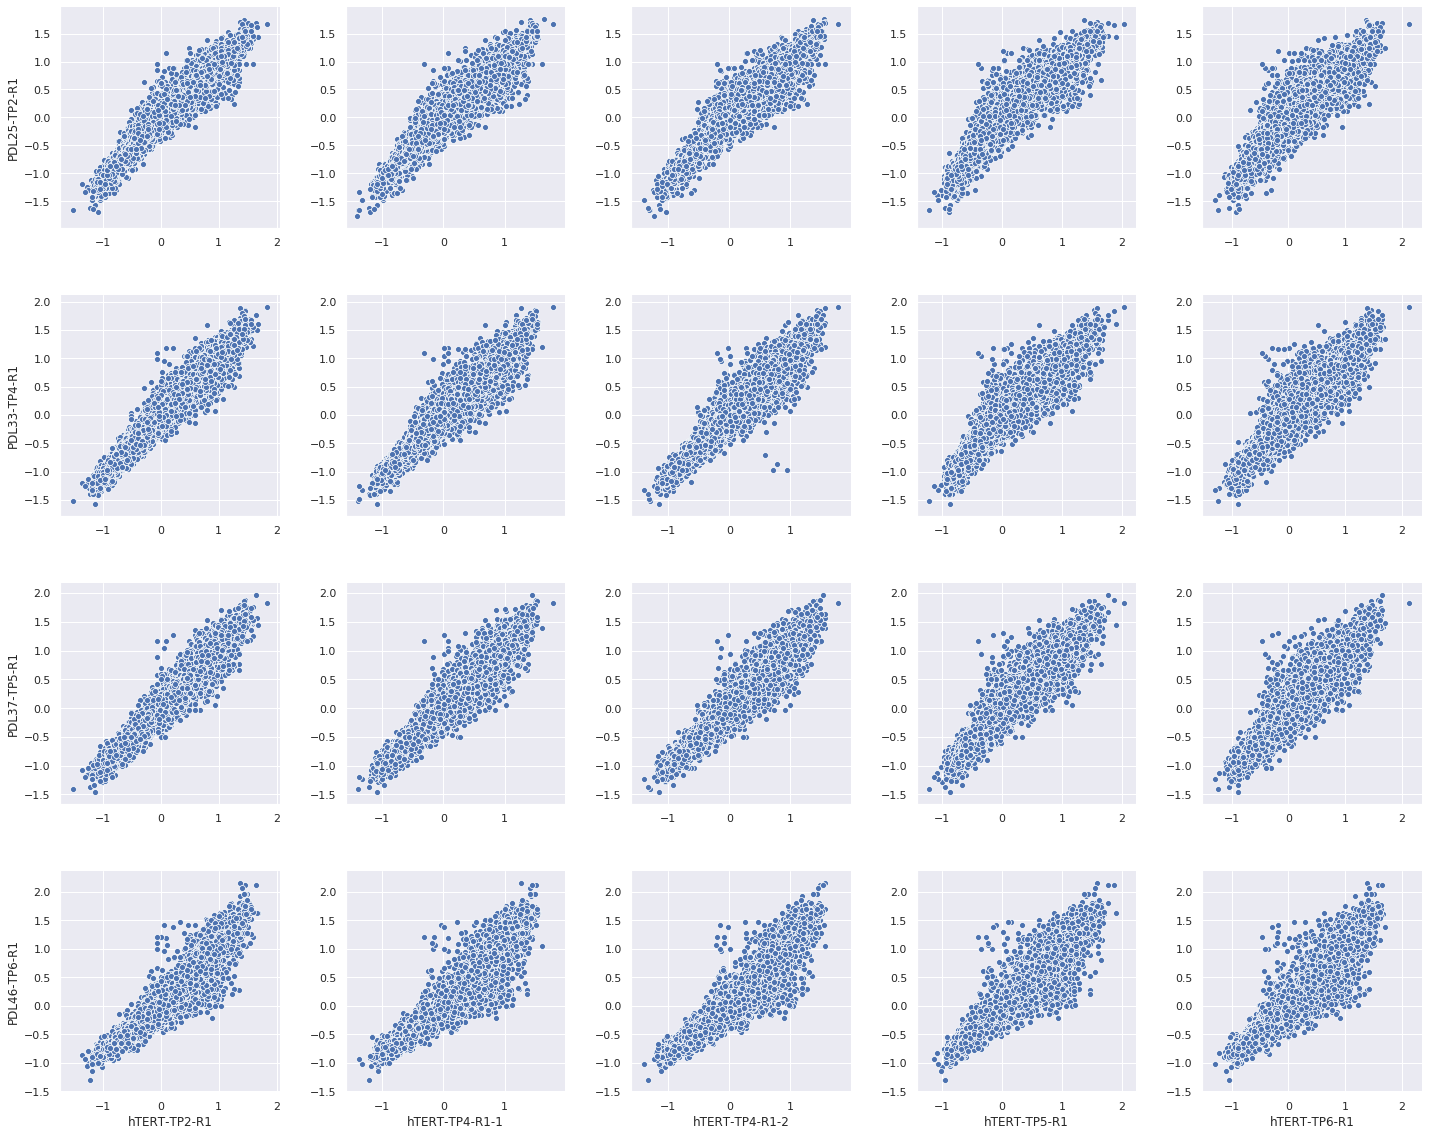

In [39]:
sns.set()
g=sns.pairplot(mega_df,size=4,
             x_vars=['hTERT-TP2-R1','hTERT-TP4-R1-1','hTERT-TP4-R1-2','hTERT-TP5-R1','hTERT-TP6-R1'],
             y_vars=['PDL25-TP2-R1','PDL33-TP4-R1','PDL37-TP5-R1','PDL46-TP6-R1'])
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_PDL)):
    for j in range(len(names_hTERT)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

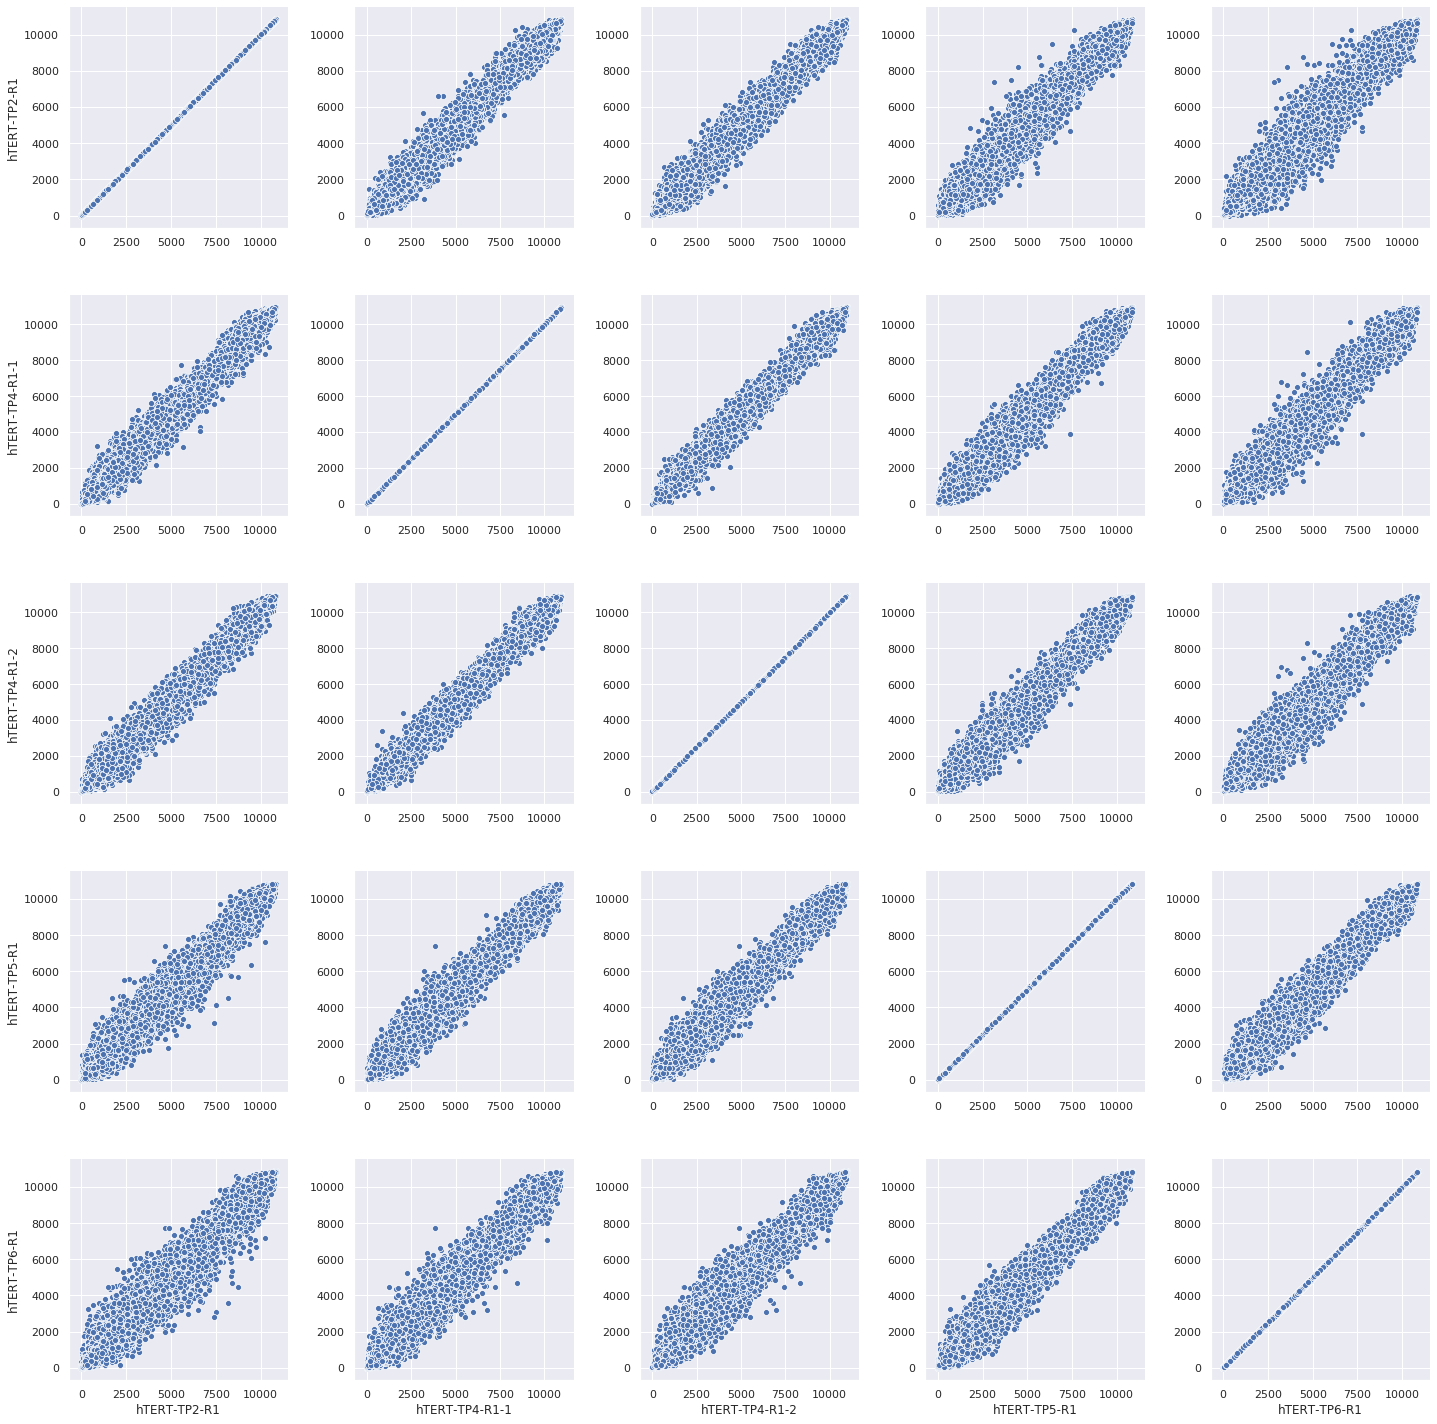

In [40]:
#Ranked Data
sns.set()
g=sns.pairplot(df1_ranked,size=4,diag_kind=None)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_hTERT)):
    for j in range(len(names_hTERT)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

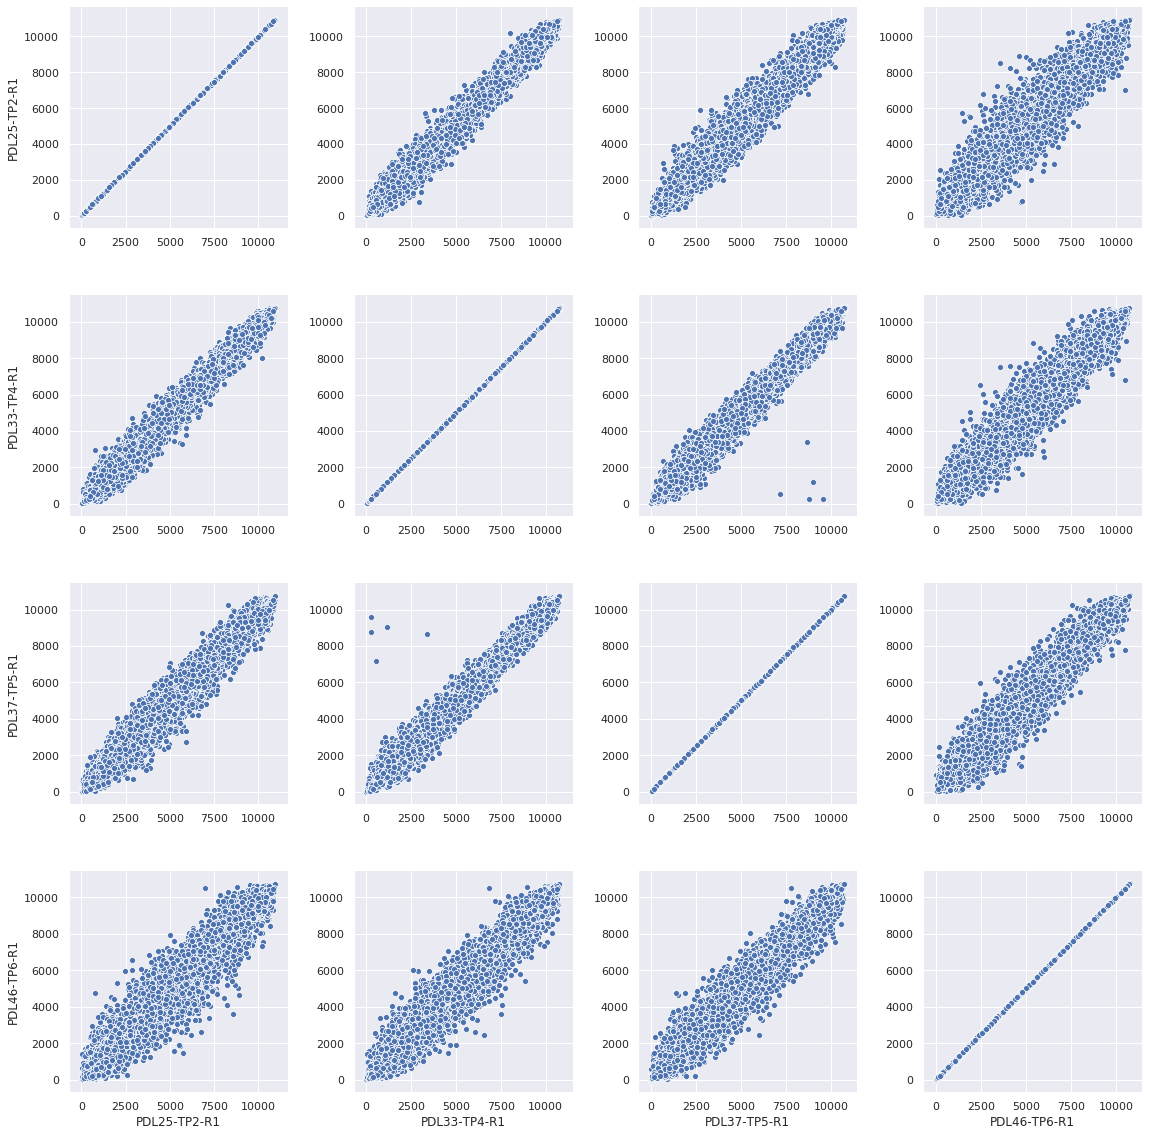

In [41]:
sns.set()
g=sns.pairplot(df2_ranked,size=4,diag_kind=None)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_PDL)):
    for j in range(len(names_PDL)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

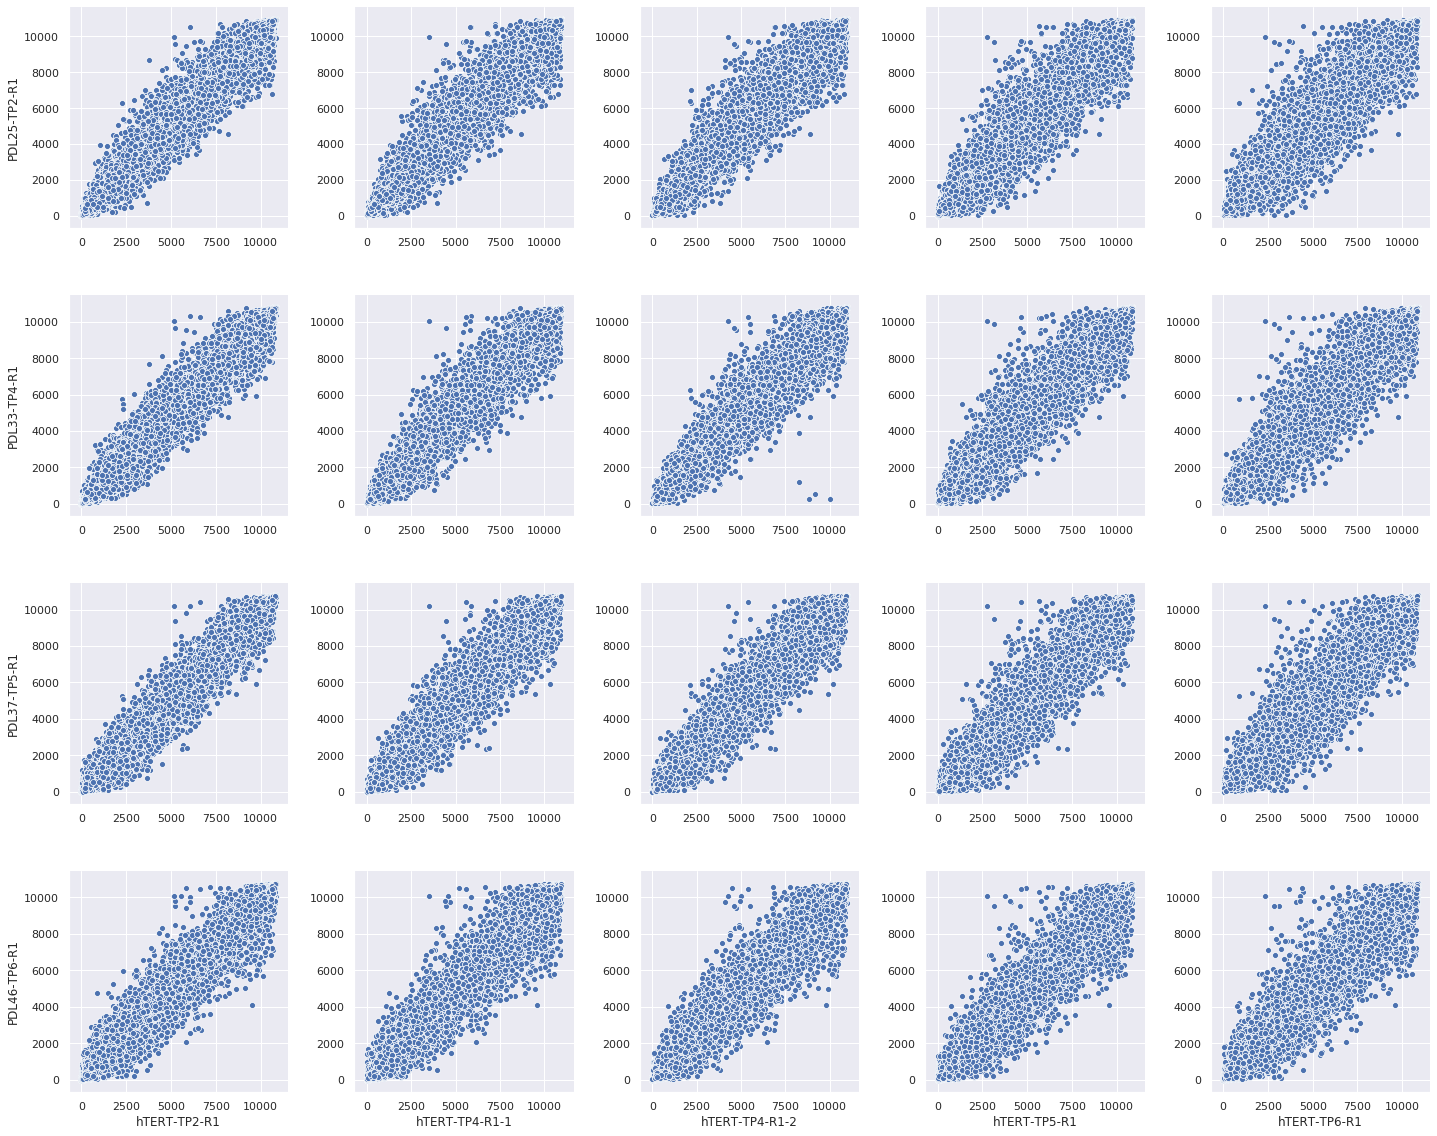

In [42]:
mega_df_ranked = pd.concat([df1_ranked,df2_ranked],axis=1)
sns.set()
g=sns.pairplot(mega_df_ranked,size=4,
             x_vars=['hTERT-TP2-R1','hTERT-TP4-R1-1','hTERT-TP4-R1-2','hTERT-TP5-R1','hTERT-TP6-R1'],
             y_vars=['PDL25-TP2-R1','PDL33-TP4-R1','PDL37-TP5-R1','PDL46-TP6-R1'])
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_PDL)):
    for j in range(len(names_hTERT)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

In [56]:
c1=pd.read_csv('MC-HiC-DpnII-WI38-hTERT-TP2-R1.cis.vecs.tsv',sep='\t')
chrms=c1[['chrom','start','end']]
mergeddf=pd.concat([chrms,mega_df_ranked],axis=1)
mergeddf.head()
mergeddf.to_csv('Ranked.tsv',index=False,sep='\t')